# Bike Demand Prediction Kaggle Project
# Shivam KAVATHE

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# treat datetime as id 
train_df = pd.read_csv('D:/Python_ML_DS/ML_Projects/bike-sharing-demand/train.csv',parse_dates=['datetime'], index_col =0)
test_df = pd.read_csv('D:/Python_ML_DS/ML_Projects/bike-sharing-demand/test.csv',parse_dates=['datetime'], index_col =0)

In [3]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train_df.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [5]:
test_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
test_df.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


In [7]:
print("Shape of training dataset: ", train_df.shape)
print("Shape of testing dataset: ", test_df.shape)

Shape of training dataset:  (10886, 11)
Shape of testing dataset:  (6493, 8)


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6493 entries, 2011-01-20 00:00:00 to 2012-12-31 23:00:00
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6493 non-null   int64  
 1   holiday     6493 non-null   int64  
 2   workingday  6493 non-null   int64  
 3   weather     6493 non-null   int64  
 4   temp        6493 non-null   float64
 5   atemp       6493 non-null   float64
 6   humidity    6493 non-null   int64  
 7   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 456.5 KB


In [10]:
train_df.isnull()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 01:00:00,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 02:00:00,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 03:00:00,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 04:00:00,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,False,False,False,False,False,False,False,False,False,False,False
2012-12-19 20:00:00,False,False,False,False,False,False,False,False,False,False,False
2012-12-19 21:00:00,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# checking the missing data in Training set
train_df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
# checking the missing data in Training set
test_df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [13]:
# drop non-important features from training dataset.
# It doesnt matter, if booking is causal or registarted in our case so I delete the feature. I just need total count.
train_df.drop(['casual','registered'], axis=1,inplace = True)

In [14]:
X_train=train_df.drop(['count'],axis=1)
Y_train=train_df['count']
X_test = test_df

In [15]:
X_train.shape

(10886, 8)

In [16]:
X_test.shape

(6493, 8)

In [17]:
# now shape of both dataset has same nummber of features so those can be merged togather to do feature engineering.
X_df = pd.concat([X_train,X_test])

In [18]:
X_df.shape

(17379, 8)

In [19]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   holiday     17379 non-null  int64  
 2   workingday  17379 non-null  int64  
 3   weather     17379 non-null  int64  
 4   temp        17379 non-null  float64
 5   atemp       17379 non-null  float64
 6   humidity    17379 non-null  int64  
 7   windspeed   17379 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.2 MB


In [20]:
# datetime strings are not usefull in regression , so I need to convert it to the seprate catagories as a hour,day,month,year
X_df['year'] = X_df.index.year
X_df['month'] = X_df.index.month
X_df['day'] = X_df.index.day
X_df['dayofweek'] = X_df.index.dayofweek
X_df['hour'] = X_df.index.hour

train_df['year'] = train_df.index.year
train_df['month'] = train_df.index.month
train_df['day'] = train_df.index.day
train_df['dayofweek'] = train_df.index.dayofweek
train_df['hour'] = train_df.index.hour

test_df['year'] = test_df.index.year
test_df['month'] = test_df.index.month
test_df['day'] = test_df.index.day
test_df['dayofweek'] = test_df.index.dayofweek
test_df['hour'] = test_df.index.hour


In [21]:
X_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,4


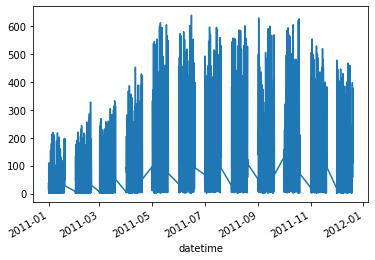

In [22]:
# as I have seen already there are no NaN values, but there can be missing data
train_df['2011-01':'2011-12']['count'].plot()
plt.show()

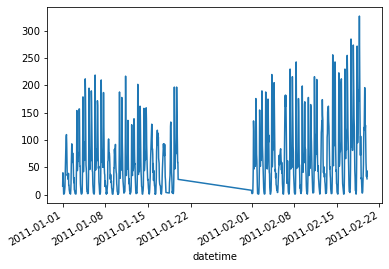

In [23]:
#plot for Single month duration
train_df['2011-01':'2011-02']['count'].plot()
plt.show()

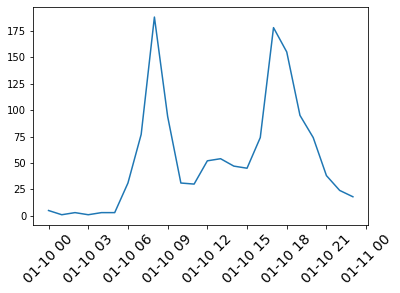

In [24]:
#plot for single day count
plt.plot(train_df['2011-01-10']['count'])
plt.xticks(fontsize=14,rotation = 45)
plt.show()

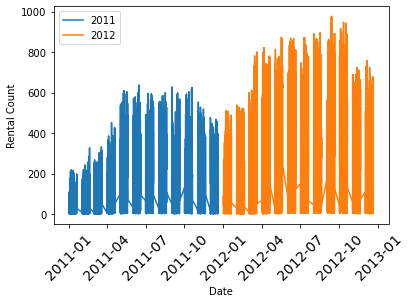

In [25]:
plt.plot(train_df['2011']['count'],label = '2011')
plt.plot(train_df['2012']['count'],label = '2012')
plt.xticks(fontsize =14, rotation =45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.legend()
plt.show()

In [26]:
train_df.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
count         1.000000
year          0.260403
month         0.166862
day           0.019826
dayofweek    -0.002283
hour          0.400601
Name: count, dtype: float64

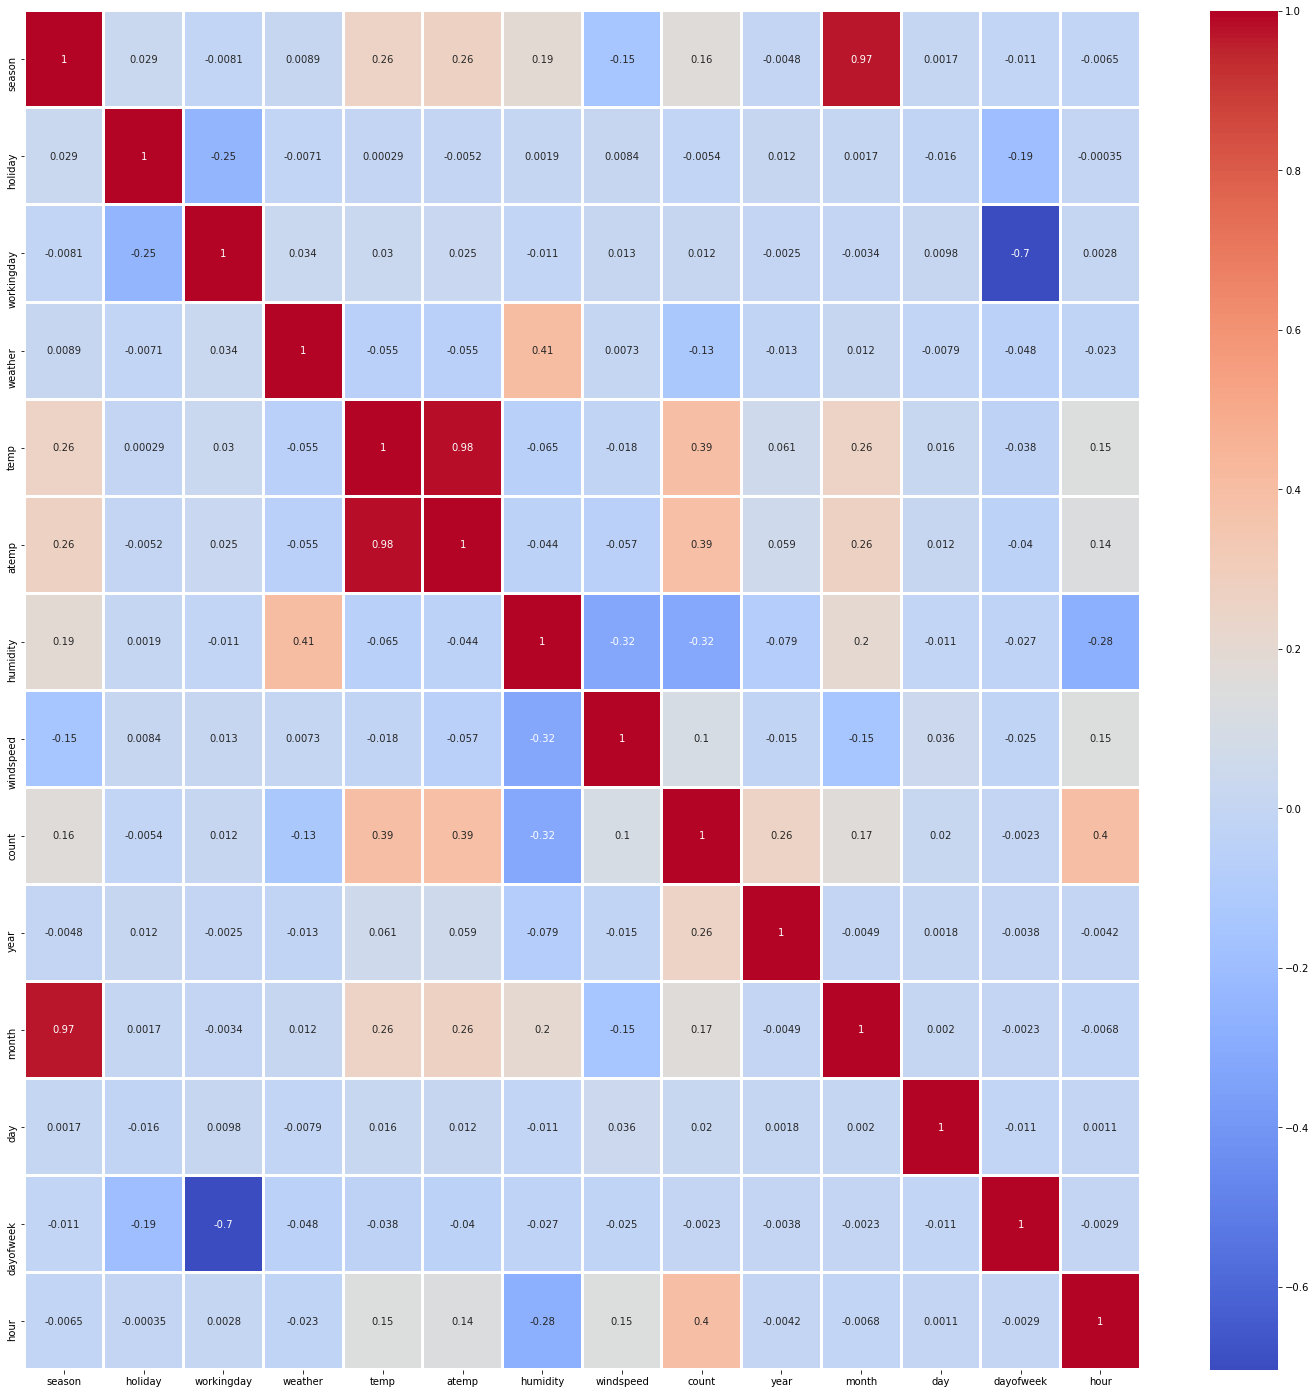

In [27]:
plt.figure(figsize=(25,25))
ax =sns.heatmap(train_df.corr(), cmap = "coolwarm", annot = True, linewidth = 2)


### Now we know the corelations between the features and final output. 

In [28]:
# Split the dataset with train and validation dataset before finalising for test set.
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_df[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','month','day','dayofweek','hour']], train_df['count'], test_size=0.30, random_state=42)

# Train dataset is 70% and validation is 30%

In [29]:
# We will use XGB linear regression 
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.8, learning_rate = 0.3,
                max_depth = 5, alpha = 10, n_estimators = 524)

In [30]:
xg_reg.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_valid, y_valid)])

[14:03:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:212.56505	validation_1-rmse:212.68578
[1]	validation_0-rmse:166.21187	validation_1-rmse:166.57524
[2]	validation_0-rmse:135.24571	validation_1-rmse:136.56276
[3]	validation_0-rmse:114.89075	validation_1-rmse:116.76804
[4]	validation_0-rmse:105.68195	validation_1-rmse:107.78237
[5]	validation_0-rmse:100.43504	validation_1-rmse:103.40266
[6]	validation_0-rmse:90.90831	validation_1-rmse:94.59800
[7]	validation_0-rmse:88.23016	validation_1-rmse:92.36206
[8]	validation_0-rmse:75.43496	validation_1-rmse:79.45337
[9]	validation_0-rmse:68.72057	validation_1-rmse:72.91503
[10]	validation_0-rmse:65.32186	validation_1-rmse:69.65087
[11]	validation_0-rmse:63.42500	validation_1-rmse:67.94109
[12]	validation_0-rmse:59.85651	validation_1-rmse:64.35579
[13]	validation_0-rmse:58.72961	validation_1-rmse:63.2

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=524, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [31]:
preds = xg_reg.predict(X_valid)

In [32]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_valid, preds))
print("RMSE: %f" % (rmse))

RMSE: 38.961380


In [33]:
# This is least RMSE , I am able to find after manipulating the hyperparameters in XGB.
# lets plot the training and validation

eval_result = xg_reg.evals_result()
training_round = range(len(eval_result['validation_0']['rmse']))
print(training_round)

range(0, 524)


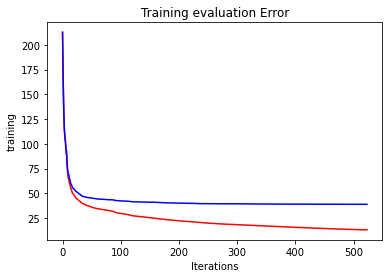

In [34]:
plt.plot(training_round, eval_result['validation_0']['rmse'], color='r', label = 'Training Error')
plt.plot(training_round, eval_result['validation_1']['rmse'], color='b', label = 'Validation Error')
plt.xlabel('Iterations')
plt.ylabel('training')
plt.title('Training evaluation Error')
plt.show()

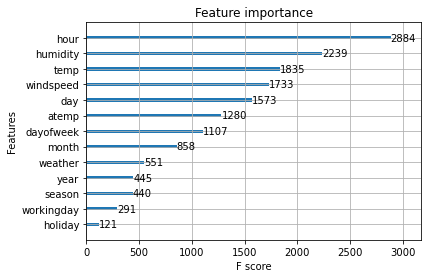

In [35]:
xgb.plot_importance(xg_reg)
plt.show()

In [36]:
pred = xg_reg.predict(test_df)

In [37]:
pred[:5]

array([15.628745 , -4.0551653, -3.5594177, -2.0519702, -3.321591 ],
      dtype=float32)

In [38]:
X_valid['pred_count'] =  preds

In [39]:
X_valid['pred_count'].describe()

count    3266.000000
mean      191.485382
std       177.342575
min      -147.326630
25%        46.760448
50%       149.586533
75%       282.995941
max       917.736450
Name: pred_count, dtype: float64

In [40]:
X_valid[X_valid['pred_count']< 0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,pred_count
datetime,,,,,,,,,,,,,,
2011-11-06 04:00:00,4,0,0,1,9.84,14.395,87,0.0000,2011,11,6,6,4,-4.878216
2012-04-12 04:00:00,2,0,1,1,12.30,14.395,61,15.0013,2012,4,12,3,4,-7.150457
2012-04-13 01:00:00,2,0,1,1,14.76,17.425,46,12.9980,2012,4,13,4,1,-2.042487
2011-03-10 21:00:00,1,0,1,3,14.76,17.425,0,15.0013,2011,3,10,3,21,-2.069136
2011-01-05 04:00:00,1,0,1,1,9.84,11.365,48,15.0013,2011,1,5,2,4,-2.466311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-06-08 02:00:00,2,0,1,1,26.24,28.790,89,6.0032,2011,6,8,2,2,-3.255968
2011-04-13 05:00:00,2,0,1,3,15.58,19.695,94,16.9979,2011,4,13,2,5,-7.576639
2012-07-16 04:00:00,3,0,1,1,27.88,31.820,79,7.0015,2012,7,16,0,4,-3.115458


In [41]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [42]:
X_valid['pred_count'] = X_valid['pred_count'].map(adjust_count)

In [43]:
X_valid['count'] = y_valid
X_valid.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,pred_count,count
datetime,,,,,,,,,,,,,,,
2011-07-19 11:00:00,3,0,1,1,33.62,40.150,59,0.0000,2011,7,19,1,11,84.342209,127
2012-01-16 06:00:00,1,1,0,1,4.10,6.820,54,6.0032,2012,1,16,0,6,16.019306,13
2011-12-11 18:00:00,4,0,0,1,9.84,11.365,48,12.9980,2011,12,11,6,18,119.820358,163
2012-08-15 10:00:00,3,0,1,2,29.52,34.090,62,12.9980,2012,8,15,2,10,206.594223,233
2012-06-15 23:00:00,2,0,1,1,25.42,31.060,53,16.9979,2012,6,15,4,23,207.926407,222


In [44]:
X_valid[X_valid['pred_count']< 0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,pred_count,count
datetime,,,,,,,,,,,,,,,


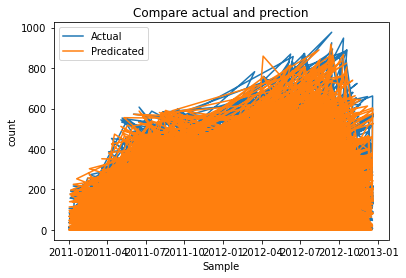

In [45]:
plt.plot(X_valid['count'],label= 'Actual')
plt.plot(X_valid['pred_count'],label = 'Predicated')
plt.xlabel('Sample')
plt.ylabel('count')

plt.title('Compare actual and prection')
plt.legend()
plt.show()

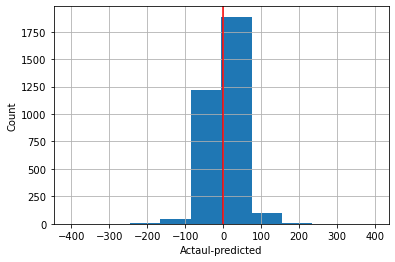

In [46]:
# I am not able to chec the differece, so lets check the residue
residuals = (X_valid['count'] - X_valid['pred_count'])
plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actaul-predicted')
plt.ylabel('Count')
plt.axvline(color ='r')
plt.show()

In [47]:
value_counts = (residuals > 0).value_counts(sort= False)
print('Under Estimation: {0:0.2f}'.format(value_counts[True]/len(residuals)))
print('Over Estimation: {0:0.2f}'.format(value_counts[False]/len(residuals)))


Under Estimation: 0.50
Over Estimation: 0.50


In [48]:
from sklearn.metrics import mean_squared_error
print('RMSE: {0:0.2f}'.format(mean_squared_error(X_valid['count'], X_valid['pred_count'])**.5))

RMSE: 38.67


In [49]:
# kaggle Competion checks the accurecy with RMSLE value not with RMSE

from sklearn.metrics import mean_squared_log_error
print('RMSE: {0:0.2f}'.format(mean_squared_log_error(X_valid['count'], X_valid['pred_count'])))

RMSE: 0.38


In [50]:
# lets make data for submission in kaggle

In [51]:
pred = xg_reg.predict(test_df)

In [52]:
test_df['count'] = pred

In [53]:
test_df['count'] = test_df['count'].map(adjust_count)

In [54]:
int(56.66 + 1)

57

In [55]:
# We need to find the round value of counts nearby the fraction value.

def get_int(x):
    y = x % 1
    if y <= 0.5:
        return int(x)
    else:
        return int(x + 1) 

In [56]:
test_df['count'] = test_df['count'].map(get_int)

In [57]:
test_df['datetime'] = test_df.index

In [58]:
test_df[['datetime','count']].to_csv('D:/Python_ML_DS/ML_Projects/bike-sharing-demand/Prediction_1.csv',index =False)

### This is one way to get the prediction . Now we will try with another way to predict the count.
### In this way we will predict casual and registered count sepratly and then Add up togather. 

In [59]:
# Split the dataset with train and validation dataset before finalising for test set.
train_df = pd.read_csv('D:/Python_ML_DS/ML_Projects/bike-sharing-demand/train.csv',parse_dates=['datetime'], index_col =0)
test_df = pd.read_csv('D:/Python_ML_DS/ML_Projects/bike-sharing-demand/test.csv',parse_dates=['datetime'], index_col =0)

train_df['year'] = train_df.index.year
train_df['month'] = train_df.index.month
train_df['day'] = train_df.index.day
train_df['dayofweek'] = train_df.index.dayofweek
train_df['hour'] = train_df.index.hour

test_df['year'] = test_df.index.year
test_df['month'] = test_df.index.month
test_df['day'] = test_df.index.day
test_df['dayofweek'] = test_df.index.dayofweek
test_df['hour'] = test_df.index.hour

X_train_C, X_valid_C, y_train_C, y_valid_C = train_test_split(train_df[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','month','day','dayofweek','hour']], train_df['casual'], test_size=0.30, random_state=42,shuffle = False)

# Train dataset is 70% and validation is 30%

In [60]:
xg_c = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.8, learning_rate = 0.5,
                max_depth = 8, alpha = 12, n_estimators = 270)

In [61]:
xg_c.fit(X_train_C,y_train_C, eval_set = [(X_train_C, y_train_C), (X_valid_C, y_valid_C)])

[14:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:34.28692	validation_1-rmse:51.50276
[1]	validation_0-rmse:21.72996	validation_1-rmse:35.09081
[2]	validation_0-rmse:15.83843	validation_1-rmse:30.17800
[3]	validation_0-rmse:12.81524	validation_1-rmse:28.37500
[4]	validation_0-rmse:11.39669	validation_1-rmse:27.91053
[5]	validation_0-rmse:10.53332	validation_1-rmse:27.73475
[6]	validation_0-rmse:9.75598	validation_1-rmse:27.33290
[7]	validation_0-rmse:9.43424	validation_1-rmse:27.33967
[8]	validation_0-rmse:8.94284	validation_1-rmse:27.17711
[9]	validation_0-rmse:8.68105	validation_1-rmse:26.84835
[10]	validation_0-rmse:8.27333	validation_1-rmse:26.74880
[11]	validation_0-rmse:8.05067	validation_1-rmse:26.63132
[12]	validation_0-rmse:7.93630	validation_1-rmse:26.55362
[13]	validation_0-rmse:7.62380	validation_1-rmse:26.51780
[14]	validation

XGBRegressor(alpha=12, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=270, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=12, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [62]:
# Now Compare it with actual values

preds_C = xg_c.predict(X_valid_C)

rmse_C = np.sqrt(mean_squared_error(y_valid_C, preds_C))
print("RMSE: %f" % (rmse_C))

RMSE: 26.651339


In [63]:
X_valid_C['Casual_pred'] = preds_C 
X_valid_C[X_valid_C['Casual_pred']< 0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,Casual_pred
datetime,,,,,,,,,,,,,,
2012-05-17 03:00:00,2,0,1,1,24.60,29.545,73,16.9979,2012,5,17,3,3,-5.086185
2012-05-19 05:00:00,2,0,0,1,18.86,22.725,67,0.0000,2012,5,19,5,5,-1.599365
2012-06-01 03:00:00,2,0,1,2,25.42,29.545,73,6.0032,2012,6,1,4,3,-0.689371
2012-06-01 04:00:00,2,0,1,2,25.42,29.545,73,6.0032,2012,6,1,4,4,-3.233812
2012-06-01 05:00:00,2,0,1,2,25.42,29.545,78,6.0032,2012,6,1,4,5,-0.322881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-16 02:00:00,4,0,0,2,13.94,17.425,87,6.0032,2012,12,16,6,2,-1.797678
2012-12-16 03:00:00,4,0,0,2,13.94,16.665,87,12.9980,2012,12,16,6,3,-4.390069
2012-12-16 04:00:00,4,0,0,2,13.94,18.180,87,0.0000,2012,12,16,6,4,-7.399748


In [64]:
X_valid_C['Casual_pred'] = X_valid_C['Casual_pred'].map(adjust_count)

In [65]:
X_valid_C[X_valid_C['Casual_pred']< 0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,Casual_pred
datetime,,,,,,,,,,,,,,


In [66]:
print('RMSLE: {0:0.2f}'.format(mean_squared_log_error(y_valid_C, X_valid_C['Casual_pred'])))

RMSLE: 0.69


In [67]:
ddd = xg_c.predict(test_df)

In [68]:
final = pd.DataFrame(columns = ['Casual','Registered','count']) 
final['Casual'] = ddd
final['Casual'] = final['Casual'].map(adjust_count)
final[final['Casual']< 0]

,Casual,Registered,count


In [69]:
X_train_R, X_valid_R, y_train_R, y_valid_R = train_test_split(train_df[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','month','day','dayofweek','hour']], train_df['registered'], test_size=0.30, random_state=42, shuffle =  False)

In [70]:
xg_r = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.5,
                max_depth = 5, alpha = 12, n_estimators = 500)

In [71]:
xg_r.fit(X_train_R,y_train_R, eval_set = [(X_train_R, y_train_R), (X_valid_R, y_valid_R)])

[14:03:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:130.59729	validation_1-rmse:228.86021
[1]	validation_0-rmse:114.39707	validation_1-rmse:205.50896
[2]	validation_0-rmse:85.21390	validation_1-rmse:169.82460
[3]	validation_0-rmse:66.50844	validation_1-rmse:145.46483
[4]	validation_0-rmse:60.67404	validation_1-rmse:129.02939
[5]	validation_0-rmse:59.61723	validation_1-rmse:128.06557
[6]	validation_0-rmse:57.68115	validation_1-rmse:123.72729
[7]	validation_0-rmse:56.74193	validation_1-rmse:123.05823
[8]	validation_0-rmse:47.31251	validation_1-rmse:109.93008
[9]	validation_0-rmse:43.00140	validation_1-rmse:98.25943
[10]	validation_0-rmse:42.69965	validation_1-rmse:98.02799
[11]	validation_0-rmse:42.28551	validation_1-rmse:97.77810
[12]	validation_0-rmse:41.96610	validation_1-rmse:97.71653
[13]	validation_0-rmse:40.98042	validation_1-rmse:96.03

XGBRegressor(alpha=12, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=12, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [72]:
rrr = xg_r.predict(test_df)

In [73]:
final['Registered'] = rrr
final['Registered'] = final['Registered'].map(adjust_count)
final[final['Registered']< 0]

,Casual,Registered,count


In [74]:
final['count'] = final['Registered'] + final['Casual']

In [75]:
final['count'] = final['count'].map(get_int)
final.head()

,Casual,Registered,count
0,4.030225,46.305099,50
1,2.667330,32.607574,35
2,2.514677,35.195114,38
3,0.037118,31.922340,32
4,1.144704,31.018063,32


In [76]:
final.drop(['Casual','Registered'], axis=1,inplace = True)

In [77]:
final['datetime'] = test_df.index

In [78]:
final[['datetime','count']].to_csv('D:/Python_ML_DS/ML_Projects/bike-sharing-demand/Prediction_2.csv',index =False)